<div style="text-align: center;">
  <h1>*** THIS IS A WORK IN PROCESS ***</h1>
</div>

# Agricultural Productivity Analysis

## Introduction

The goal of this analysis is to study the relationship between land use, irrigation, and crop yield across different countries or regions. We will focus on indicators like "Crop production index," "Arable land," "Agricultural machinery," and "Irrigated land area", to determine how irrigation or land use influences productivity, and suggest optimal practices for improving yield.

For this analysis, we will use the `Agriculture and Rural Development Data` from the <a href='https://data.worldbank.org/topic/1'> World Bank Group</a>, which includes measures of agricultural inputs, outputs, and productivity compiled by the UN's Food and Agriculture Organization.

## Data Overview and Preprocessing

In [1]:
# Import necessary libraries/packages
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import re

In [2]:
# Import data
raw_data = pd.read_csv('agri_data.csv', skiprows=4)

In [3]:
raw_data.sample(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
7816,Peru,PER,Rural population,SP.RUR.TOTL,5410495.0,5.511688e+06,5.556418e+06,5.597227e+06,5.635104e+06,5.670711e+06,...,6.954087e+06,6.992733e+06,7.041702e+06,7.114817e+06,7.188973e+06,7.228131e+06,7.248826e+06,7.249838e+06,7.240866e+06,NaN
8199,Paraguay,PRY,"Agriculture, forestry, and fishing, value adde...",NV.AGR.TOTL.CD,NaN,NaN,1.334683e+08,1.466429e+08,1.534365e+08,1.628333e+08,...,3.418513e+09,3.860340e+09,3.971789e+09,4.002514e+09,3.666422e+09,3.801161e+09,4.506022e+09,4.571810e+09,4.875042e+09,NaN
7118,Malaysia,MYS,Food production index (2014-2016 = 100),AG.PRD.FOOD.XD,NaN,1.863000e+01,1.891000e+01,1.974000e+01,1.957000e+01,2.144000e+01,...,1.007500e+02,1.029800e+02,1.010800e+02,9.981000e+01,9.688000e+01,1.028400e+02,1.028000e+02,1.028000e+02,NaN,NaN
76,Africa Eastern and Southern,AFE,Arable land (% of land area),AG.LND.ARBL.ZS,NaN,4.702843e+00,4.754588e+00,4.866723e+00,4.918674e+00,4.972683e+00,...,8.016863e+00,8.098773e+00,8.193305e+00,8.256337e+00,8.284319e+00,8.304220e+00,8.322455e+00,NaN,NaN,NaN
10075,Tonga,TON,Agricultural land (% of land area),AG.LND.AGRI.ZS,NaN,3.750000e+01,3.888889e+01,4.027778e+01,4.027778e+01,4.166667e+01,...,4.861111e+01,4.861111e+01,4.861111e+01,4.861111e+01,4.861111e+01,4.861111e+01,4.861111e+01,NaN,NaN,NaN


In [4]:
# Checking whether or not all the values in the last columns are NaN
raw_data['Unnamed: 68'][~raw_data['Unnamed: 68'].isna()].count()

0

In [5]:
raw_data.drop(['Unnamed: 68'], axis=1, inplace=True)
raw_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,Agricultural raw materials exports (% of merch...,TX.VAL.AGRI.ZS.UN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.055358,0.092621,0.085188,0.079480,0.076267,0.104098,0.069199,0.102736,0.228271,0.117845
1,Aruba,ABW,Agricultural raw materials imports (% of merch...,TM.VAL.AGRI.ZS.UN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.398228,0.496427,0.335550,0.297792,0.311423,0.350670,0.339582,0.353604,0.332377,0.328433
2,Aruba,ABW,Rural population (% of total population),SP.RUR.TOTL.ZS,49.224,49.239000,49.254000,49.2700,49.285000,49.300000,...,56.959000,56.892000,56.808000,56.707000,56.589000,56.454000,56.303000,56.134000,55.948000,55.746000
3,Aruba,ABW,Rural population growth (annual %),SP.RUR.TOTL.ZG,NaN,2.211234,1.577679,1.4226,1.245827,1.065002,...,0.601746,0.520623,0.442423,0.358555,0.287256,0.213237,-0.133220,-0.347205,-0.417236,-0.520208
4,Aruba,ABW,Rural population,SP.RUR.TOTL,26880.000,27481.000000,27918.000000,28318.0000,28673.000000,28980.000000,...,59006.000000,59314.000000,59577.000000,59791.000000,59963.000000,60091.000000,60011.000000,59803.000000,59554.000000,59245.000000


We have the years in the columns. This is not a practical format for analyzing the data. We'll change the structure to a 'long format', so that we have rows corresponding to the combination of countries, indicators and years.

In [6]:
# Changing years to rows
data = raw_data.melt(id_vars = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],
                       var_name = 'Year',
                       value_name = 'Value')

data['Year'] = data['Year'].astype(int)

data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Value
0,Aruba,ABW,Agricultural raw materials exports (% of merch...,TX.VAL.AGRI.ZS.UN,1960,NaN
1,Aruba,ABW,Agricultural raw materials imports (% of merch...,TM.VAL.AGRI.ZS.UN,1960,NaN
2,Aruba,ABW,Rural population (% of total population),SP.RUR.TOTL.ZS,1960,49.224
3,Aruba,ABW,Rural population growth (annual %),SP.RUR.TOTL.ZG,1960,NaN
4,Aruba,ABW,Rural population,SP.RUR.TOTL,1960,26880.000


In [7]:
data.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       'Year', 'Value'],
      dtype='object')

In [8]:
# Checking distinct countries
data['Country Name'].nunique()

266

There are over 260 distinct values in the `Country Name` column, which is higher than the number of countries. Let's compare this column with the `countries` table to determine what are the other values.

In [9]:
countries = pd.read_csv('country_continent.csv')

In [10]:
countries_list = countries['country'].tolist()

data['Country Name'][~data['Country Name'].isin(countries_list)].unique()

array(['Africa Eastern and Southern', 'Africa Western and Central',
       'Arab World', 'Bahamas, The', 'Brunei Darussalam',
       'Central Europe and the Baltics', 'Channel Islands',
       "Cote d'Ivoire", 'Congo, Dem. Rep.', 'Congo, Rep.', 'Cabo Verde',
       'Caribbean small states', 'Curacao', 'Czechia',
       'East Asia & Pacific (excluding high income)',
       'Early-demographic dividend', 'East Asia & Pacific',
       'Europe & Central Asia (excluding high income)',
       'Europe & Central Asia', 'Egypt, Arab Rep.', 'Euro area',
       'European Union', 'Fragile and conflict affected situations',
       'Fiji', 'Micronesia, Fed. Sts.', 'Gambia, The', 'High income',
       'Hong Kong SAR, China', 'Heavily indebted poor countries (HIPC)',
       'IBRD only', 'IDA & IBRD total', 'IDA total', 'IDA blend',
       'IDA only', 'Isle of Man', 'Not classified', 'Iran, Islamic Rep.',
       'Kyrgyz Republic', 'St. Kitts and Nevis', 'Korea, Rep.',
       'Latin America & Caribbean (

We can see that this column also has regions and subregions (such as Africa Eastern and Southern), income groups (such as High income), special groupings (such as OECD members) and others. In addition, there are countries with variant names (such as Turkiye and Viet Nam) and disputed territories (such as Kosovo).

In [11]:
# Loading categories table - additional values of the Country Name column with their respective categories
categories = pd.read_csv('categories.csv')

In [12]:
# Merging the tables to identify the categories of the values in the Country Name column (based on the additional values)
data = data.merge(categories, left_on='Country Name', right_on='original', how='left')

# Adding 'country' as category to those values included in the country_continent table 
data['category'][data['Country Name'].isin(countries_list)] = 'Country'

data.sample(10)

/var/folders/mg/hptp2zld5cl6kjcrwfys_p5h0000gn/T/ipykernel_6995/4040192521.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['category'][data['Country Name'].isin(countries_list)] = 'Country'


,Country Name,Country Code,Indicator Name,Indicator Code,Year,Value,original,category
261428,Indonesia,IDN,Food production index (2014-2016 = 100),AG.PRD.FOOD.XD,1983,4.412000e+01,NaN,Country
351523,Cambodia,KHM,Land area (sq. km),AG.LND.TOTL.K2,1991,1.765200e+05,NaN,Country
159082,East Asia & Pacific,EAS,Forest area (% of land area),AG.LND.FRST.ZS,1974,NaN,East Asia & Pacific,Region
679338,Serbia,SRB,Rural land area where elevation is below 5 met...,AG.LND.EL5M.RU.ZS,2020,NaN,NaN,Country
330413,Maldives,MDV,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,1989,NaN,NaN,Country
4303,IBRD only,IBD,Livestock production index (2014-2016 = 100),AG.PRD.LVSK.XD,1960,NaN,IBRD only,Special Group
463092,Kazakhstan,KAZ,Agricultural raw materials exports (% of merch...,TX.VAL.AGRI.ZS.UN,2001,1.377101e+00,NaN,Country
118651,Mozambique,MOZ,Agricultural raw materials imports (% of merch...,TM.VAL.AGRI.ZS.UN,1970,NaN,NaN,Country
311859,Tunisia,TUN,"Agriculture, forestry, and fishing, value adde...",NV.AGR.TOTL.CD,1987,1.596791e+09,NaN,Country
404447,Cyprus,CYP,Forest area (sq. km),AG.LND.FRST.K2,1996,1.674100e+03,NaN,Country


In [13]:
# Making sure each row has a category
data['category'].isna().sum()

0

In [14]:
data.drop(['original'], axis=1, inplace=True)

In [15]:
# Changing the order of the columns
order_columns = ['category', 'Country Name', 'Country Code', 'Year', 'Indicator Name', 'Indicator Code', 'Value']
data = data[order_columns]

In [16]:
columns = data.columns

# Renaming columns for standardisation
def renaming_columns(columns):
    '''
    Rename the columns of a dataframe by separating camelCase, removing leading and trailing spaces,
    changing to lowercase, and replacing spaces between words with underscores for snake case.
    
    parameters: columns - a list of the original headers of the dataframe.
    
    returns: a dictionary with the the original headers as keys and cleaned headers as items.
    '''
    
    new_headers = {}
    
    for header in columns:
        new_header = re.sub(r'([a-z])([A-Z])', r'\1 \2', header)  #split camel case into sep words
        new_header = new_header.strip().lower().replace(' ', '_') 
        new_headers[header] = new_header
        
    return new_headers

columns_clean = renaming_columns(columns)

In [17]:
data = data.rename(columns = columns_clean)
data.columns

Index(['category', 'country_name', 'country_code', 'year', 'indicator_name',
       'indicator_code', 'value'],
      dtype='object')

## Initial EDA

In [18]:
# Looking at the distinct indicators available
data['indicator_name'].unique()

array(['Agricultural raw materials exports (% of merchandise exports)',
       'Agricultural raw materials imports (% of merchandise imports)',
       'Rural population (% of total population)',
       'Rural population growth (annual %)', 'Rural population',
       'Employment in agriculture (% of total employment) (modeled ILO estimate)',
       'Employment in agriculture, male (% of male employment) (modeled ILO estimate)',
       'Employment in agriculture, female (% of female employment) (modeled ILO estimate)',
       'Agriculture, forestry, and fishing, value added (% of GDP)',
       'Agriculture, forestry, and fishing, value added (current US$)',
       'Annual freshwater withdrawals, agriculture (% of total freshwater withdrawal)',
       'Rural population living in areas where elevation is below 5 meters (% of total population)',
       'Agricultural nitrous oxide emissions (% of total)',
       'Agricultural nitrous oxide emissions (thousand metric tons of CO2 equivalent)',

In [19]:
data.shape

(715008, 7)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715008 entries, 0 to 715007
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   category        715008 non-null  object 
 1   country_name    715008 non-null  object 
 2   country_code    715008 non-null  object 
 3   year            715008 non-null  int64  
 4   indicator_name  715008 non-null  object 
 5   indicator_code  715008 non-null  object 
 6   value           411959 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 38.2+ MB


In [21]:
# Percentage of values missing 
data['value'].isna().sum()/len(data)

0.42384001297887575

In [22]:
data['year'].describe()

count    715008.000000
mean       1991.500000
std          18.472966
min        1960.000000
25%        1975.750000
50%        1991.500000
75%        2007.250000
max        2023.000000
Name: year, dtype: float64

In [23]:
# Selecting relevant indicators for the analysis
relevant_indicators = ['Cereal yield (kg per hectare)',
'Livestock production index (2014-2016 = 100)',
'Food production index (2014-2016 = 100)',
'Crop production index (2014-2016 = 100)',
'Cereal production (metric tons)',
'Land under cereal production (hectares)',
'Arable land (% of land area)',
'Arable land (hectares per person)', 
'Arable land (hectares)',
'Agricultural land (% of land area)', 
'Agricultural land (sq. km)',
'Permanent cropland (% of land area)',
'Fertilizer consumption (kilograms per hectare of arable land)',
'Fertilizer consumption (% of fertilizer production)',
'Agricultural machinery, tractors',
'Agricultural irrigated land (% of total agricultural land)',
'Annual freshwater withdrawals, agriculture (% of total freshwater withdrawal)',
'Average precipitation in depth (mm per year)',
'Agriculture, forestry, and fishing, value added (% of GDP)',
'Agriculture, forestry, and fishing, value added (current US$)']

In [24]:
# Filter the data to include only the relevant indicators for productivity analysis
data_prod = data[data['indicator_name'].isin(relevant_indicators)]

Let's explore the patterns in missing data to determine how it might affect the analysis.

In [25]:
# Missing values of the relevant indicators
missing_data_indicators = data_prod.groupby('indicator_name').agg({'value': lambda x: x.isnull().sum()}).reset_index()
missing_data_indicators.columns = ['indicator_name', 'missing_val_cnt']

missing_data_indicators.sort_values(by='missing_val_cnt')

,indicator_name,missing_val_cnt
2,Agricultural land (sq. km),1408
1,Agricultural land (% of land area),2310
7,Arable land (% of land area),2493
8,Arable land (hectares per person),2637
19,Permanent cropland (% of land area),3204
17,Land under cereal production (hectares),3910
11,Cereal production (metric tons),3910
12,Cereal yield (kg per hectare),3963
15,Fertilizer consumption (kilograms per hectare ...,4778
9,Arable land (hectares),5382


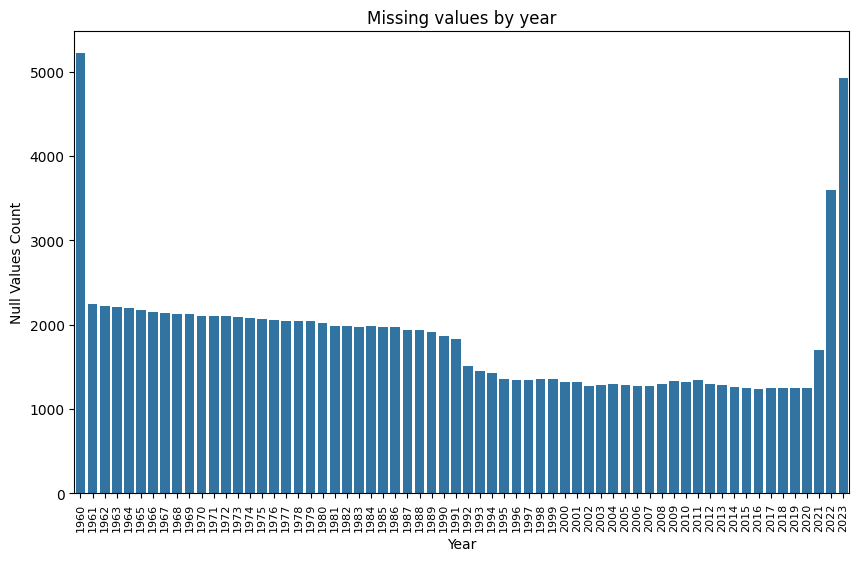

In [26]:
# Missing Values by year
missing_data_year = data_prod.groupby('year').agg({'value': lambda x: x.isnull().sum()}).reset_index()
missing_data_year.columns = ['year', 'null_cnt']

# Plot missign values
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=missing_data_year, x='year', y='null_cnt')

ax.set_title('Missing values by year')
ax.set_ylabel('Null Values Count')
ax.set_xlabel('Year')

plt.xticks(rotation=90, fontsize=8)
plt.show()

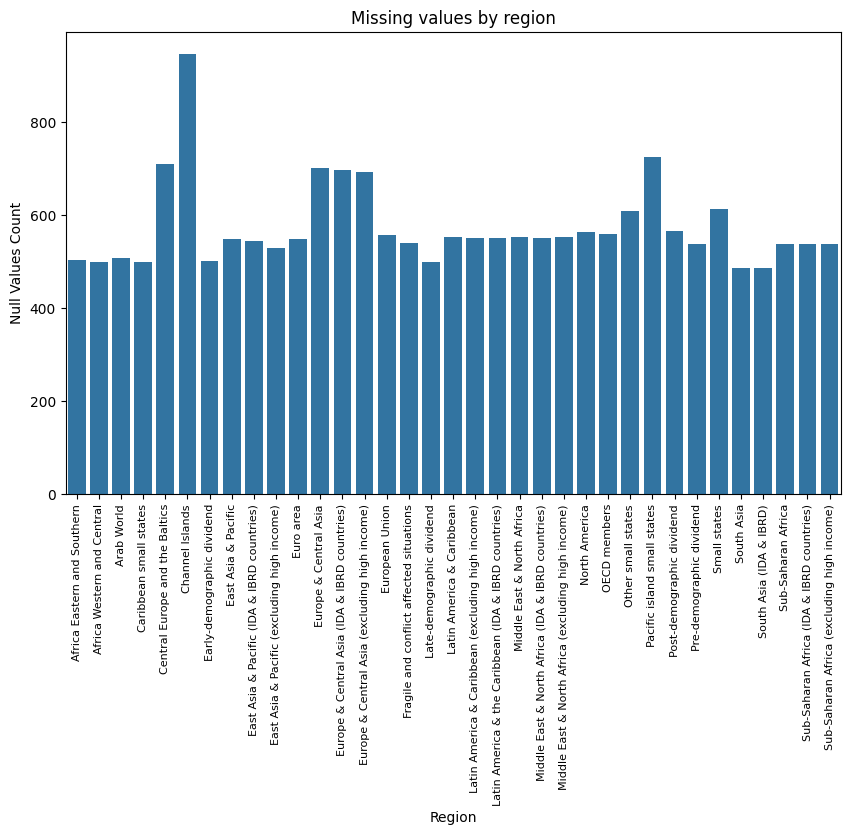

In [27]:
# Missing Values by region
only_regions = data_prod[['country_name', 'value']][data_prod['category'] == 'Region']

missing_data_region = only_regions.groupby('country_name').agg({'value': lambda x: x.isnull().sum()}).reset_index()
missing_data_region.columns = ['region', 'null_cnt']

# Plot missing values
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=missing_data_region, x='region', y='null_cnt')

ax.set_title('Missing values by region')
ax.set_ylabel('Null Values Count')
ax.set_xlabel('Region')

plt.xticks(rotation=90, fontsize=8)
plt.show()

In [28]:
# Missing Values by continent
data_countries = data_prod[data_prod['category'] == 'Country']

data_continents = data_countries.merge(countries, left_on='country_name', right_on='country', how='left')
data_continents.drop(labels=['country'], axis=1, inplace=True)

data_continents[data_continents['continent'].isna()]['country_name'].unique()

array(['Bahamas, The', 'Brunei Darussalam', "Cote d'Ivoire",
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Cabo Verde', 'Curacao',
       'Czechia', 'Egypt, Arab Rep.', 'Fiji', 'Micronesia, Fed. Sts.',
       'Gambia, The', 'Hong Kong SAR, China', 'Isle of Man',
       'Iran, Islamic Rep.', 'Kyrgyz Republic', 'St. Kitts and Nevis',
       'Korea, Rep.', 'Lao PDR', 'Libya', 'St. Lucia', 'Macao SAR, China',
       'St. Martin (French part)', "Korea, Dem. People's Rep.",
       'Slovak Republic', 'Eswatini', 'Sint Maarten (Dutch part)',
       'Syrian Arab Republic', 'Timor-Leste', 'Turkiye',
       'St. Vincent and the Grenadines', 'Venezuela, RB', 'Viet Nam',
       'Yemen, Rep.'], dtype=object)

In [29]:
# List the additional countries that are written differently with their respective continent
add_countries = {
    'country': ['Bahamas, The', 'Brunei Darussalam', "Cote d'Ivoire",
                'Congo, Dem. Rep.', 'Congo, Rep.', 'Cabo Verde', 'Curacao',
                'Czechia', 'Egypt, Arab Rep.', 'Fiji', 'Micronesia, Fed. Sts.',
                'Gambia, The', 'Hong Kong SAR, China', 'Isle of Man',
                'Iran, Islamic Rep.', 'Kyrgyz Republic', 'St. Kitts and Nevis',
                'Korea, Rep.', 'Lao PDR', 'Libya', 'St. Lucia', 'Macao SAR, China',
                'St. Martin (French part)', "Korea, Dem. People's Rep.",
                'Slovak Republic', 'Eswatini', 'Sint Maarten (Dutch part)',
                'Syrian Arab Republic', 'Timor-Leste', 'Turkiye',
                'St. Vincent and the Grenadines', 'Venezuela, RB', 'Viet Nam',
                'Yemen, Rep.'],
    
    'continent': ['North America', 'Asia', 'Africa',
                  'Africa', 'Africa', 'Africa', 'North America',
                  'Europe', 'Africa', 'Oceania', 'Oceania',
                  'Africa', 'Asia', 'Europe',
                  'Asia', 'Asia', 'North America',
                  'Asia', 'Asia', 'Africa', 'North America', 'Asia',
                  'North America', 'Asia',
                  'Europe', 'Africa', 'North America',
                  'Asia', 'Asia', 'Asia',
                  'North America', 'South America', 'Asia',
                  'Asia']
}

additional_countries = pd.DataFrame(add_countries)

In [30]:
# Adint the additional countries that are written differently
data_continents = data_continents.merge(additional_countries, left_on='country_name', right_on='country', how='left')

In [31]:
data_continents['continent'] = data_continents['continent_x'].fillna(data_continents['continent_y'])
data_continents.drop(labels=['country', 'continent_x', 'continent_y'], axis=1, inplace=True)

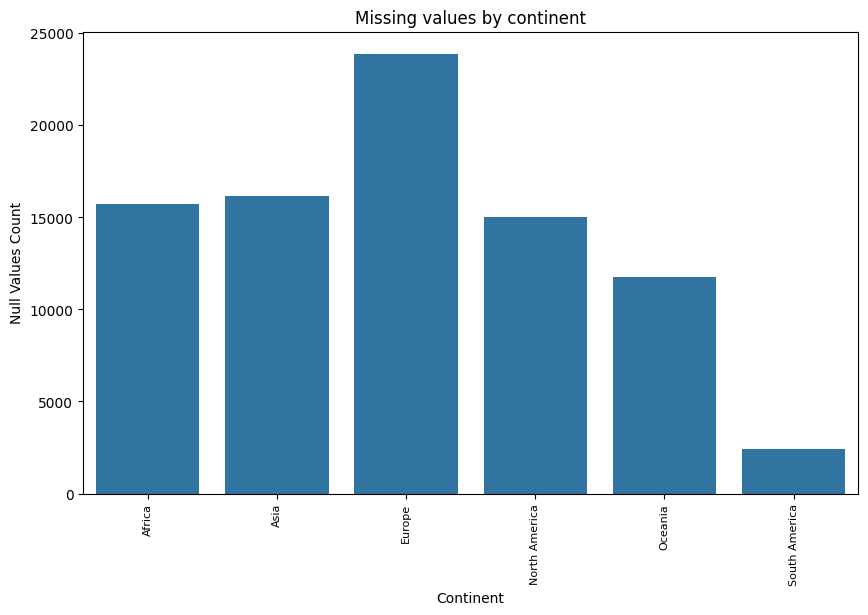

In [32]:
# Missing Values by continent
missing_data_continent = data_continents.groupby('continent').agg({'value': lambda x: x.isnull().sum()}).reset_index()
missing_data_continent.columns = ['continent', 'null_cnt']

# Plot missing values
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=missing_data_continent, x='continent', y='null_cnt')

ax.set_title('Missing values by continent')
ax.set_ylabel('Null Values Count')
ax.set_xlabel('Continent')

plt.xticks(rotation=90, fontsize=8)
plt.show()

In [33]:
data_continents['indicator_name'].unique()

array(['Agriculture, forestry, and fishing, value added (% of GDP)',
       'Agriculture, forestry, and fishing, value added (current US$)',
       'Annual freshwater withdrawals, agriculture (% of total freshwater withdrawal)',
       'Cereal yield (kg per hectare)',
       'Livestock production index (2014-2016 = 100)',
       'Food production index (2014-2016 = 100)',
       'Crop production index (2014-2016 = 100)',
       'Cereal production (metric tons)',
       'Average precipitation in depth (mm per year)',
       'Agricultural irrigated land (% of total agricultural land)',
       'Permanent cropland (% of land area)',
       'Land under cereal production (hectares)',
       'Arable land (% of land area)',
       'Arable land (hectares per person)', 'Arable land (hectares)',
       'Agricultural land (% of land area)', 'Agricultural land (sq. km)',
       'Fertilizer consumption (kilograms per hectare of arable land)',
       'Fertilizer consumption (% of fertilizer production

In [34]:
# Missing values of the relevant indicators
missing_data_indicators = data[data['indicator_name'].isin(relevant_indicators)].groupby('indicator_name').agg({'value': lambda x: x.isnull().sum()}).reset_index()
missing_data_indicators.columns = ['indicator_name', 'missing_val_cnt']
missing_data_indicators

,indicator_name,missing_val_cnt
0,Agricultural irrigated land (% of total agricu...,15968
1,Agricultural land (% of land area),2310
2,Agricultural land (sq. km),1408
3,"Agricultural machinery, tractors",8824
4,"Agriculture, forestry, and fishing, value adde...",6252
5,"Agriculture, forestry, and fishing, value adde...",6360
6,"Annual freshwater withdrawals, agriculture (% ...",11131
7,Arable land (% of land area),2493
8,Arable land (hectares per person),2637
9,Arable land (hectares),5382


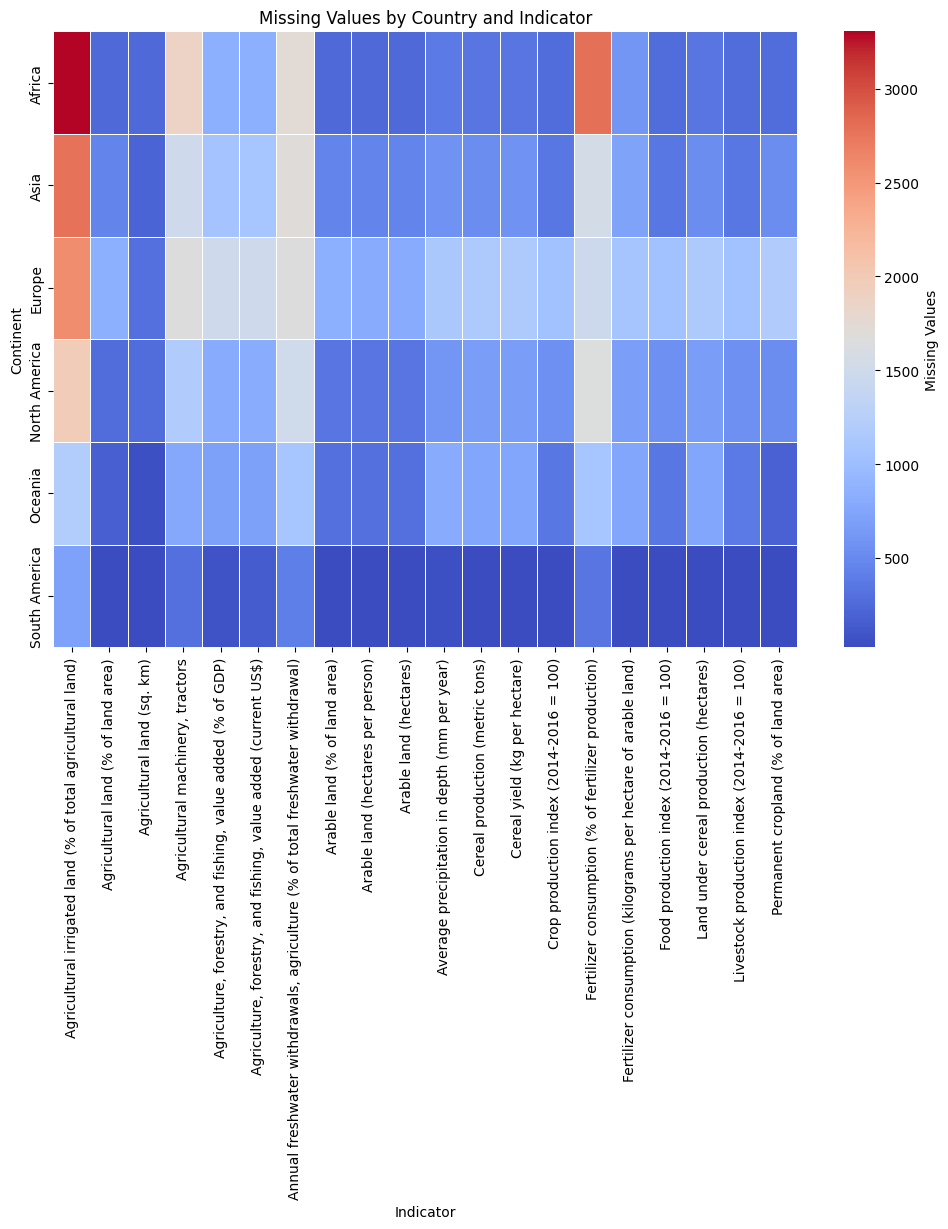

In [35]:
data_prod_missing = data_continents.groupby(['continent', 'year', 'indicator_name']).agg({'value': lambda x: x.isnull().sum()}).reset_index()
data_prod_missing.columns = ['continent', 'year', 'indicator_name', 'missing_values']

heatmap_continent = data_prod_missing.pivot_table(index='continent', columns='indicator_name', values='missing_values', aggfunc='sum')

# Visualizing missing values by country and indicator
plt.figure(figsize=(12, 8)) 
ax = sns.heatmap(heatmap_continent, cmap="coolwarm", cbar_kws={'label': 'Missing Values'}, linewidths=0.5)

plt.title('Missing Values by Country and Indicator')
plt.xlabel('Indicator')
plt.ylabel('Continent')

plt.show()

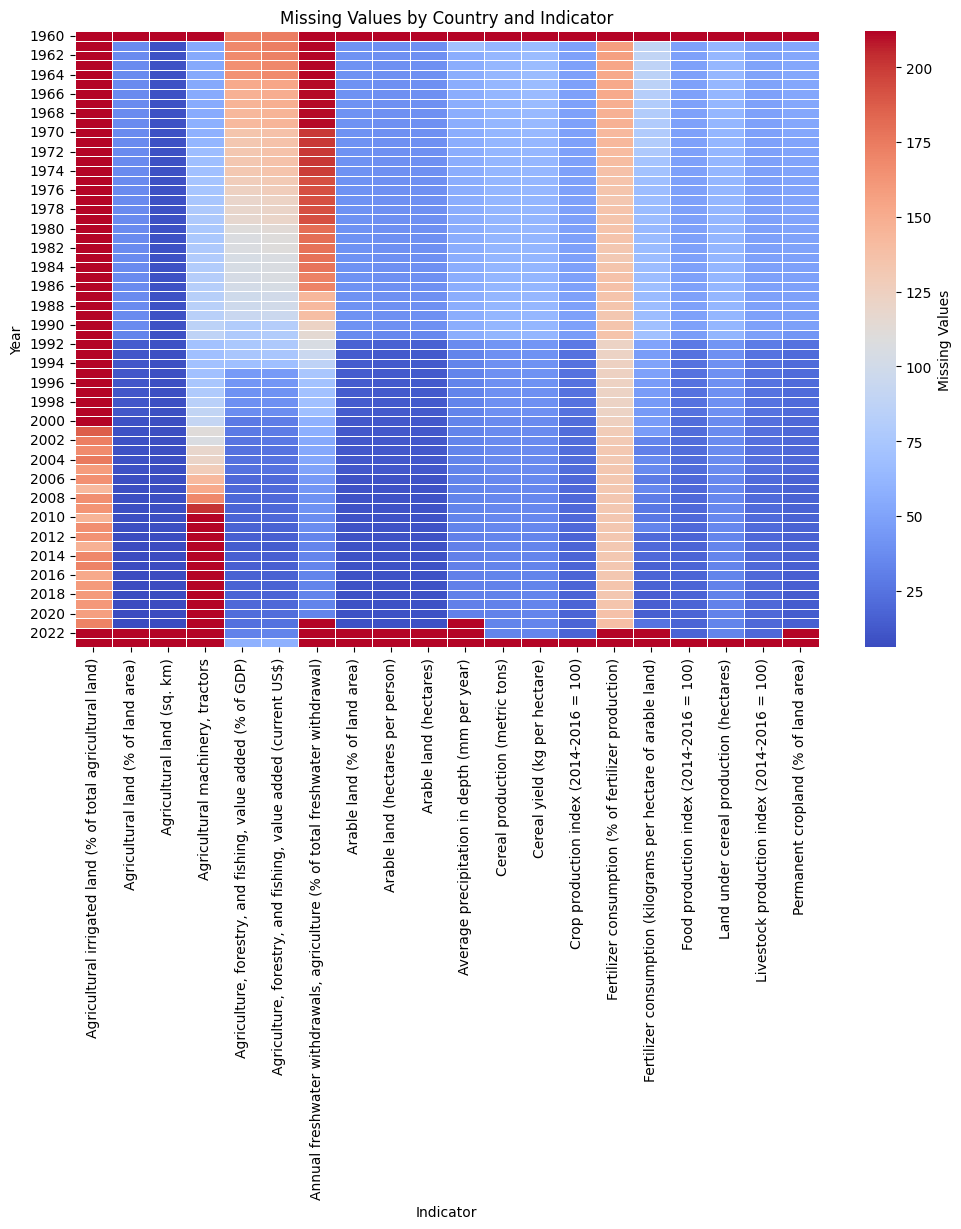

In [36]:
heatmap_year = data_prod_missing.pivot_table(index='year', columns='indicator_name', values='missing_values', aggfunc='sum')

# Visualizing missing values by country and indicator
plt.figure(figsize=(12, 8)) 
ax = sns.heatmap(heatmap_year, cmap="coolwarm", cbar_kws={'label': 'Missing Values'}, linewidths=0.5)

plt.title('Missing Values by Country and Indicator')
plt.xlabel('Indicator')
plt.ylabel('Year')

plt.show()

In [37]:
# Selecting relevant indicators for the analysis after analyzing missing data
relevant_indicators = ['Livestock production index (2014-2016 = 100)',
'Food production index (2014-2016 = 100)',
'Crop production index (2014-2016 = 100)',
'Arable land (hectares)',
'Agricultural land (sq. km)',
'Permanent cropland (% of land area)',
'Agriculture, forestry, and fishing, value added (% of GDP)',
'Agriculture, forestry, and fishing, value added (current US$)']

In [38]:
data_productivity = data_continents[data_continents['indicator_name'].isin(relevant_indicators)].reset_index(drop=True)
data_productivity = data_productivity.loc[(data_productivity['year'] >= 1995) & (data_productivity['year'] <= 2020)].reset_index(drop=True)

data_productivity

,category,country_name,country_code,year,indicator_name,indicator_code,value,continent
0,Country,Aruba,ABW,1995,"Agriculture, forestry, and fishing, value adde...",NV.AGR.TOTL.ZS,5.059222e-01,North America
1,Country,Aruba,ABW,1995,"Agriculture, forestry, and fishing, value adde...",NV.AGR.TOTL.CD,6.681564e+06,North America
2,Country,Aruba,ABW,1995,Livestock production index (2014-2016 = 100),AG.PRD.LVSK.XD,NaN,North America
3,Country,Aruba,ABW,1995,Food production index (2014-2016 = 100),AG.PRD.FOOD.XD,NaN,North America
4,Country,Aruba,ABW,1995,Crop production index (2014-2016 = 100),AG.PRD.CROP.XD,NaN,North America
...,...,...,...,...,...,...,...,...
44091,Country,Zimbabwe,ZWE,2020,Food production index (2014-2016 = 100),AG.PRD.FOOD.XD,1.103400e+02,Africa
44092,Country,Zimbabwe,ZWE,2020,Crop production index (2014-2016 = 100),AG.PRD.CROP.XD,1.277700e+02,Africa
44093,Country,Zimbabwe,ZWE,2020,Permanent cropland (% of land area),AG.LND.CROP.ZS,2.584981e-01,Africa
44094,Country,Zimbabwe,ZWE,2020,Arable land (hectares),AG.LND.ARBL.HA,4.000000e+06,Africa


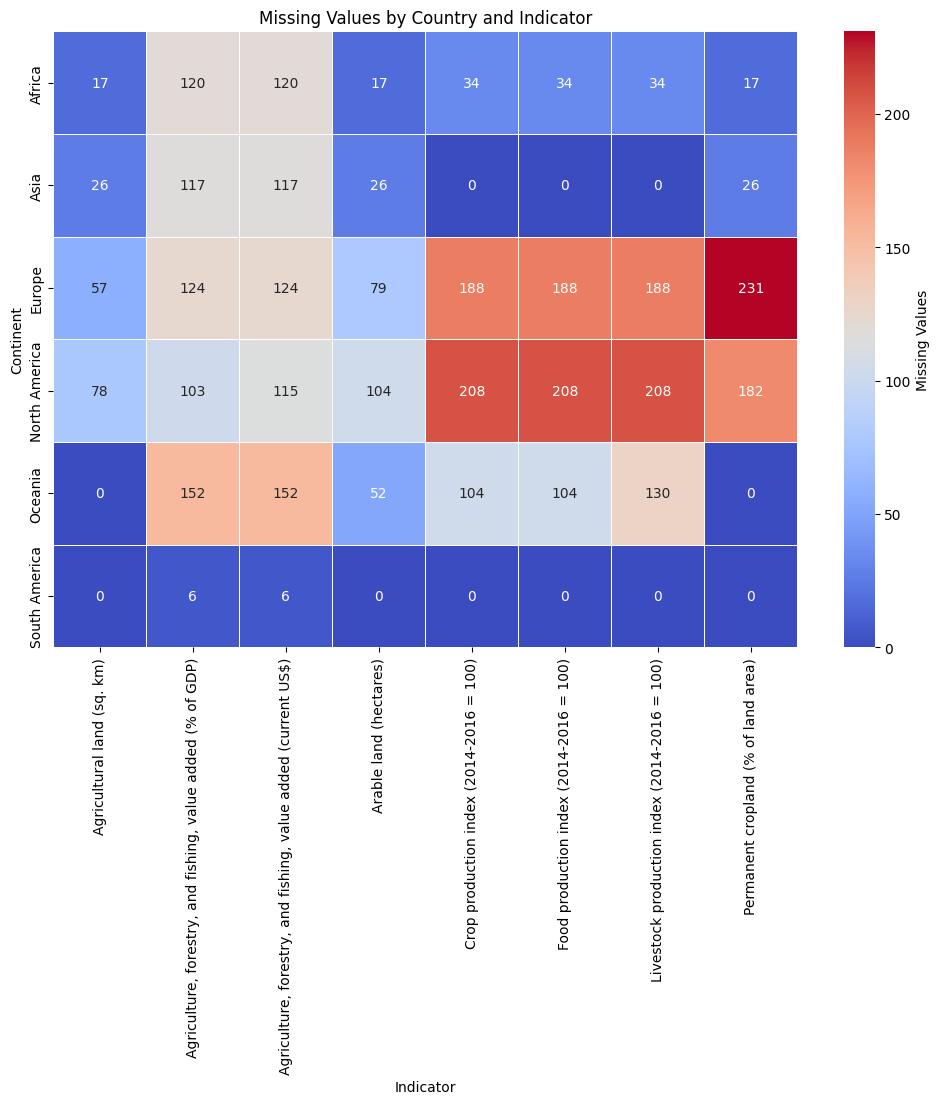

In [39]:
data_productivity_missing = data_productivity.groupby(['continent', 'year', 'indicator_name']).agg({'value': lambda x: x.isnull().sum()}).reset_index()
data_productivity_missing.columns = ['continent', 'year', 'indicator_name', 'missing_values']

heatmap_continent = data_productivity_missing.pivot_table(index='continent', columns='indicator_name', values='missing_values', aggfunc='sum')

# Visualizing missing values by country and indicator
plt.figure(figsize=(12, 8)) 
ax = sns.heatmap(heatmap_continent, cmap="coolwarm", cbar_kws={'label': 'Missing Values'}, linewidths=0.5, annot=True, fmt='d')

plt.title('Missing Values by Country and Indicator')
plt.xlabel('Indicator')
plt.ylabel('Continent')

plt.show()

Based on the missing values observed by year and indicator, we will base our analysis on the 1995 - 2020 period for the following indicators:

* **Agricultural Productivity**
    * Food production index (2014-2016 = 100)
    * Crop production index (2014-2016 = 100)
    * Livestock production index (2014-2016 = 100)
* **Land Use Availability**
    * Agricultural land (sq. km)
    * Arable land (hectares)
    * Permanent cropland (% of land area)
* **Economic Value**
    *  Agriculture, forestry, and fishing, value added (% of GDP)
    *  Agriculture, forestry, and fishing, value added (current US$)
 
We will only consider South Americaand compare its changes across time with the Dominican Republic.

In [40]:
# Separating the data for South America (as) and Dominican Republic (dr) for further manipulation
data_sa = data_productivity[data_productivity['continent'] == 'South America']
data_sa = data_sa[['country_name', 'year', 'indicator_name', 'value', 'continent']]

data_dr = data_productivity[data_productivity['country_name'] == 'Dominican Republic']
data_dr = data_dr[['country_name', 'year', 'indicator_name', 'value', 'continent']]

In [41]:
data_combined_country = pd.concat([data_sa, data_dr])

data_combined_country['location'] = data_combined_country['country_name'].apply(lambda x: 'Dominican Republic' if x == 'Dominican Republic' else 'South America')

data_combined_country.drop(['continent'], axis=1, inplace=True)
data_combined = data_combined_country[['location', 'year', 'indicator_name', 'value']]

In [42]:
# Getting continent-level averages and renaming columns
data_sa_avg = data_sa.groupby(['continent', 'year', 'indicator_name']).agg({'value': 'mean'}).reset_index()
data_sa_avg = data_sa_avg.rename(columns={'continent': 'location'})

In [43]:
# Getting relevant columns and renaming 
data_dr = data_dr[['country_name', 'year', 'indicator_name', 'value']]
data_dr = data_dr.rename(columns={'country_name': 'location'})

In [44]:
# Concatenating both frames
data_sa_dr = pd.concat([data_sa_avg, data_dr])

In [45]:
# Dividing the indicators into categories

productivity = ['Livestock production index (2014-2016 = 100)',
'Food production index (2014-2016 = 100)',
'Crop production index (2014-2016 = 100)'
]

land_use = [
    'Arable land (hectares)',
    'Agricultural land (sq. km)',
    'Permanent cropland (% of land area)'
]

economic_value = [
    'Agriculture, forestry, and fishing, value added (% of GDP)',
    'Agriculture, forestry, and fishing, value added (current US$)'
]

In [46]:
def get_indicator_type(indicator_name):
    if indicator_name in productivity:
        return 'productivity'
    if indicator_name in land_use:
        return 'land use'
    if indicator_name in economic_value:
        return 'economic value'

data_sa_avg['indicator_type'] = data_sa_avg['indicator_name'].apply(get_indicator_type)
data_dr['indicator_type'] = data_dr['indicator_name'].apply(get_indicator_type)
data_sa_dr['indicator_type'] = data_sa_dr['indicator_name'].apply(get_indicator_type)
data_combined['indicator_type'] = data_combined['indicator_name'].apply(get_indicator_type)
data_combined_country['indicator_type'] = data_combined_country['indicator_name'].apply(get_indicator_type)

<Figure size 1000x800 with 0 Axes>

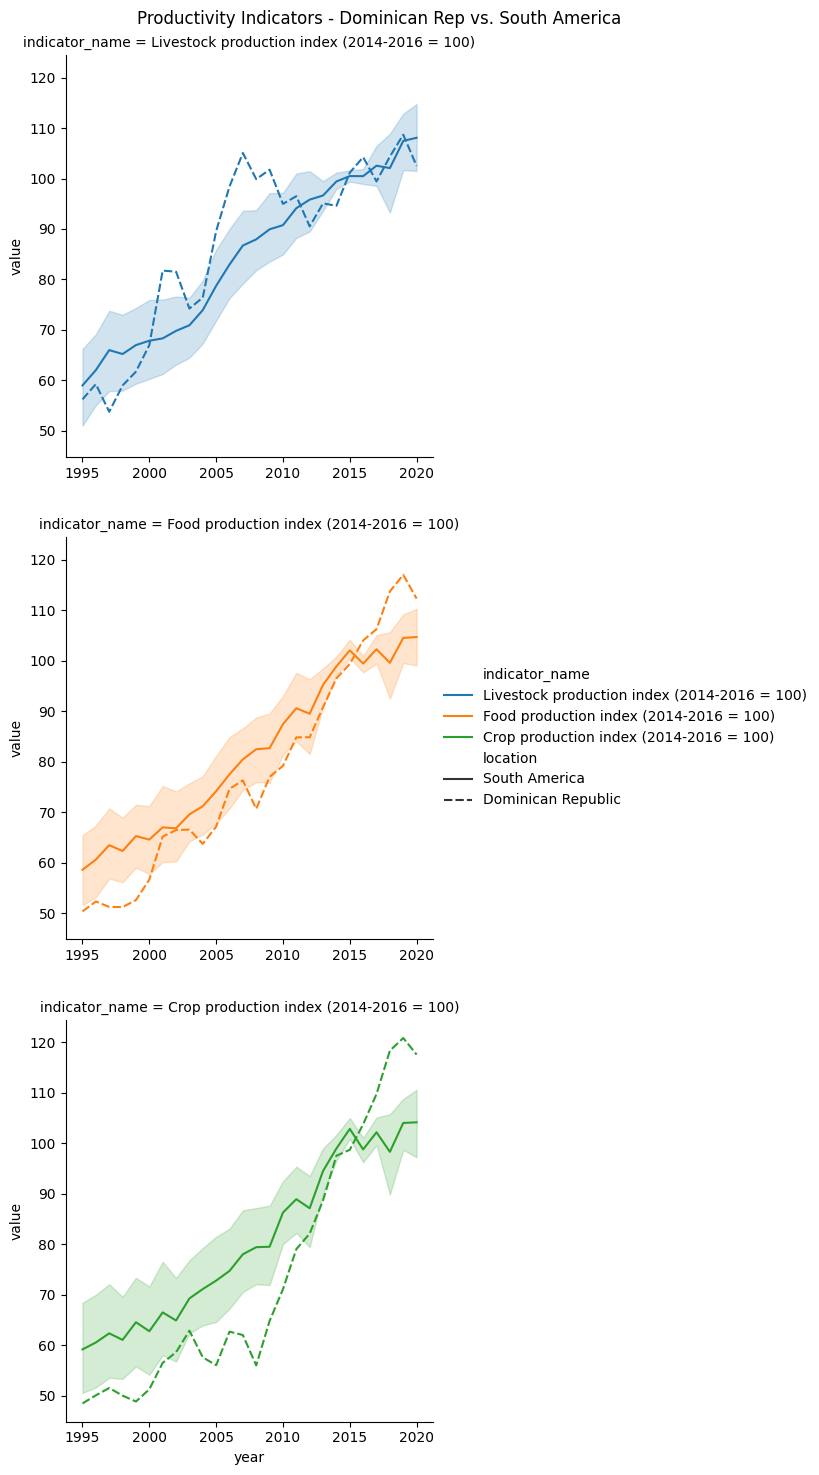

In [47]:
data = data_combined[data_combined['indicator_type'] == 'productivity']

plt.figure(figsize=(10,8))

ax = sns.relplot(data=data, kind='line', x='year', y='value', hue='indicator_name', row='indicator_name', style='location')
ax.fig.suptitle('Productivity Indicators - Dominican Rep vs. South America')

plt.subplots_adjust(top=0.95, hspace=0.2) 

for axes in ax.axes.flat:
    axes.tick_params(labelbottom=True) 
    
plt.show()

<Figure size 1000x800 with 0 Axes>

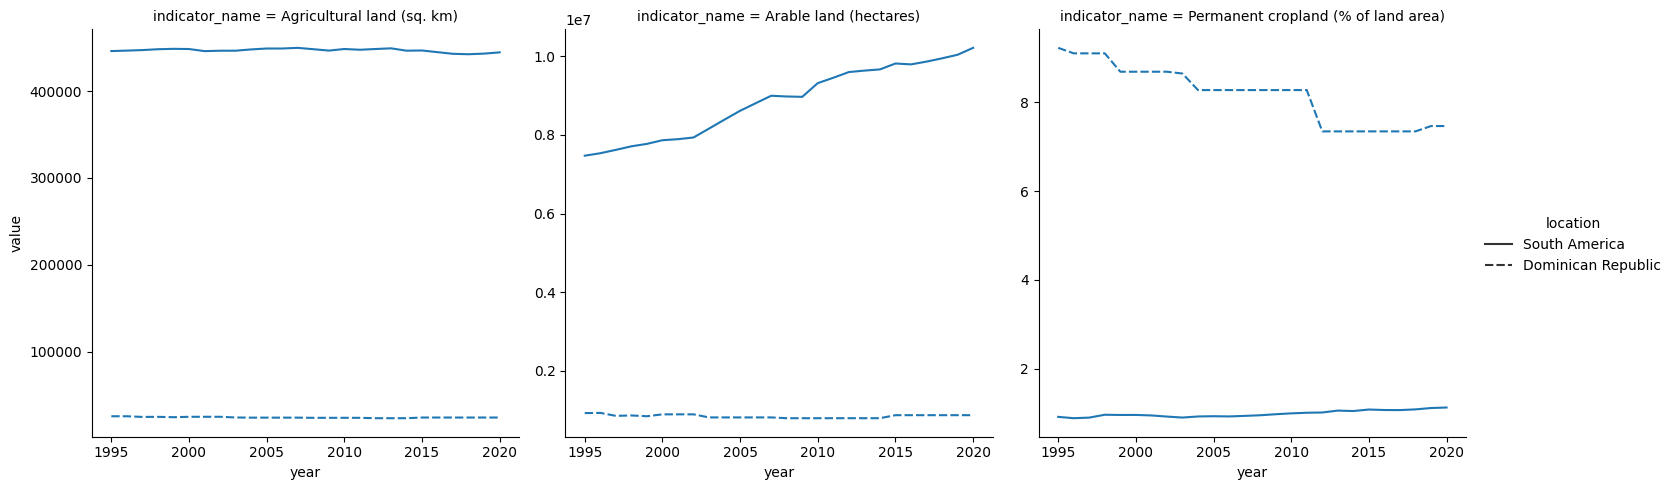

In [48]:
data = data_sa_dr[data_sa_dr['indicator_type'] == 'land use']

plt.figure(figsize=(10,8))

ax = sns.relplot(data=data, kind='line', x='year', y='value', col='indicator_name', style='location', facet_kws={'sharey': False})

Given the significant difference in land size between the Dominican Republic and many South American Countries, along with the variability in size within those countries, direct comparisons are not meaningful. Instead, we will calculate the Year-over-year change for these indicators to get a better understanding of the land use changes over time.

In [49]:
data_landuse = data_combined_country[data_combined_country['indicator_name'].isin(land_use)]

data_landuse['yoy_change'] = data_landuse.groupby(['country_name', 'indicator_name'])['value'].transform(lambda x: x.pct_change()*100)

landuse_sa = data_landuse[data_landuse['location'] == 'South America']
landuse_dr = data_landuse[['year', 'indicator_name', 'yoy_change', 'location']][data_landuse['location'] == 'Dominican Republic']

/var/folders/mg/hptp2zld5cl6kjcrwfys_p5h0000gn/T/ipykernel_6995/1437337067.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_landuse['yoy_change'] = data_landuse.groupby(['country_name', 'indicator_name'])['value'].transform(lambda x: x.pct_change()*100)


In [50]:
landuse_dr

,year,indicator_name,yoy_change,location
429,1995,Permanent cropland (% of land area),NaN,Dominican Republic
430,1995,Arable land (hectares),NaN,Dominican Republic
431,1995,Agricultural land (sq. km),NaN,Dominican Republic
2125,1996,Permanent cropland (% of land area),-1.345291,Dominican Republic
2126,1996,Arable land (hectares),0.537634,Dominican Republic
...,...,...,...,...
41134,2019,Arable land (hectares),0.000000,Dominican Republic
41135,2019,Agricultural land (sq. km),0.000000,Dominican Republic
42829,2020,Permanent cropland (% of land area),0.000000,Dominican Republic
42830,2020,Arable land (hectares),0.000000,Dominican Republic


In [51]:
landuse_sa = landuse_sa.groupby(['year', 'indicator_name']).agg({'yoy_change': 'mean'}).reset_index()
landuse_sa['location'] = 'South America'

In [52]:
data_landuse_agg = pd.concat([landuse_dr, landuse_sa], ignore_index=True)
data_landuse_agg

,year,indicator_name,yoy_change,location
0,1995,Permanent cropland (% of land area),NaN,Dominican Republic
1,1995,Arable land (hectares),NaN,Dominican Republic
2,1995,Agricultural land (sq. km),NaN,Dominican Republic
3,1996,Permanent cropland (% of land area),-1.345291,Dominican Republic
4,1996,Arable land (hectares),0.537634,Dominican Republic
...,...,...,...,...
151,2019,Arable land (hectares),-0.041671,South America
152,2019,Permanent cropland (% of land area),-0.115032,South America
153,2020,Agricultural land (sq. km),-0.333206,South America
154,2020,Arable land (hectares),0.827882,South America


<Figure size 1000x800 with 0 Axes>

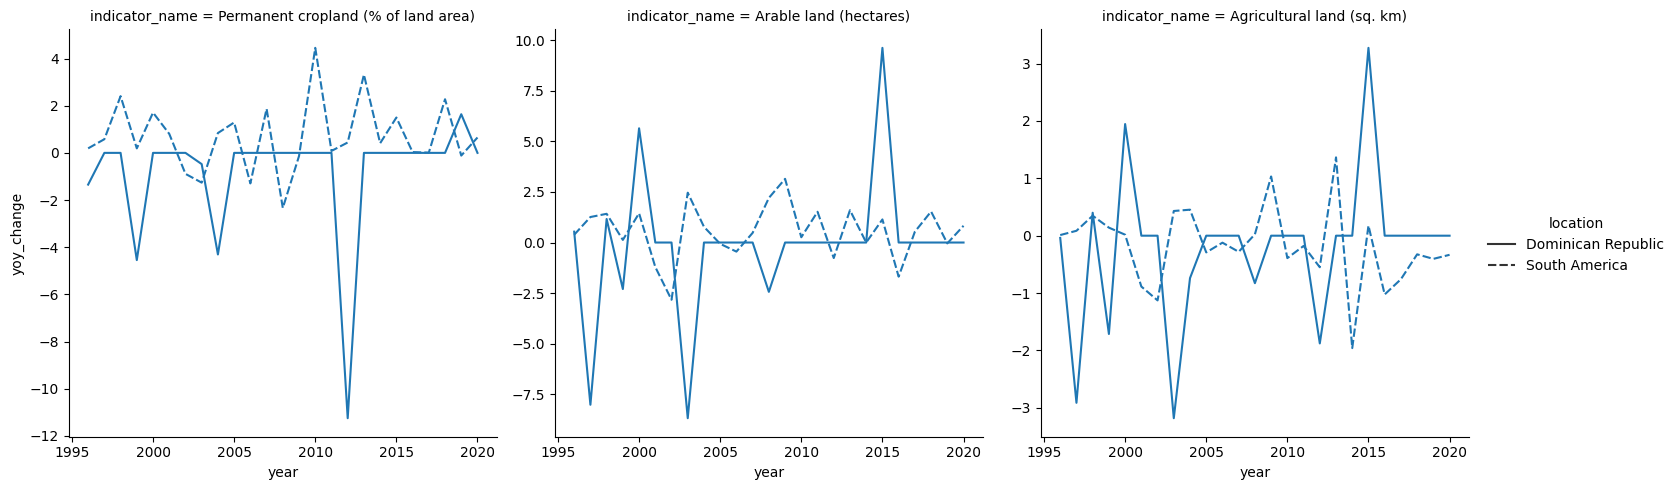

In [53]:
#data = data_landuse[data_sa_dr['indicator_type'] == 'land use']

plt.figure(figsize=(10,8))

ax = sns.relplot(data=data_landuse_agg, kind='line', x='year', y='yoy_change', col='indicator_name', style='location', facet_kws={'sharey': False})

<Figure size 1000x800 with 0 Axes>

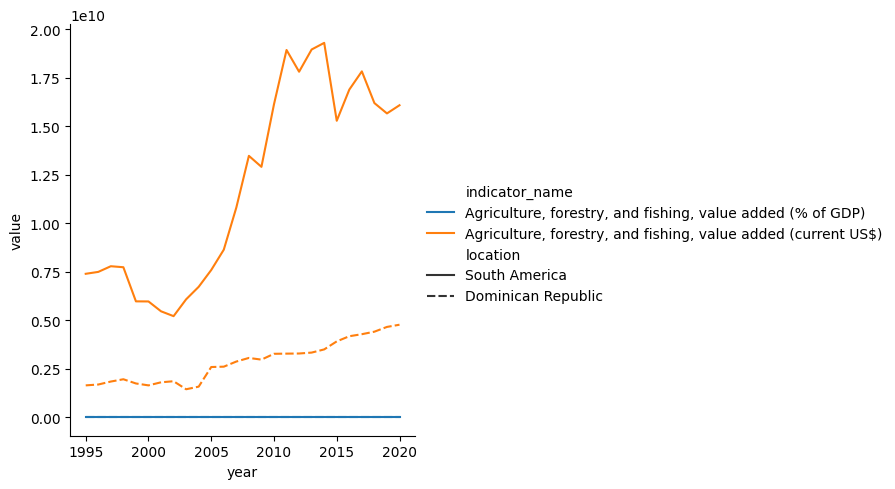

In [61]:
data = data_sa_dr[data_sa_dr['indicator_type'] == 'economic value']

plt.figure(figsize=(10,8))

ax = sns.relplot(data=data, kind='line', x='year', y='value', hue='indicator_name', style='location')
plt.show()

In [62]:
data_sa_dr[data_sa_dr['indicator_name'] == 'Agriculture, forestry, and fishing, value added (% of GDP)'].head()

,location,year,indicator_name,value,indicator_type
1,South America,1995,"Agriculture, forestry, and fishing, value adde...",13.594911,economic value
9,South America,1996,"Agriculture, forestry, and fishing, value adde...",12.885798,economic value
17,South America,1997,"Agriculture, forestry, and fishing, value adde...",12.177102,economic value
25,South America,1998,"Agriculture, forestry, and fishing, value adde...",11.331728,economic value
33,South America,1999,"Agriculture, forestry, and fishing, value adde...",11.176993,economic value


In [56]:
selected_continents = ['South America', 'Asia', 'Africa']
data_productivity = data_productivity[data_productivity['continent'].isin(selected_continents)]

In [57]:
data_productivity.sample(5)

,category,country_name,country_code,year,indicator_name,indicator_code,value,continent
18150,Country,Oman,OMN,2005,Arable land (hectares),AG.LND.ARBL.HA,28000.00000,Asia
10707,Country,Gabon,GAB,2001,Food production index (2014-2016 = 100),AG.PRD.FOOD.XD,75.72000,Africa
9334,Country,Lao PDR,LAO,2000,Arable land (hectares),AG.LND.ARBL.HA,920000.00000,Asia
16064,Country,Kyrgyz Republic,KGZ,2004,"Agriculture, forestry, and fishing, value adde...",NV.AGR.TOTL.ZS,29.90445,Asia
7184,Country,Djibouti,DJI,1999,"Agriculture, forestry, and fishing, value adde...",NV.AGR.TOTL.ZS,NaN,Africa


In [58]:
data_by_continent = data_productivity.groupby(['continent', 'indicator_name', 'year']).agg({'value': 'mean'}).reset_index()
data_by_continent

,continent,indicator_name,year,value
0,Africa,Agricultural land (sq. km),1995,200616.233434
1,Africa,Agricultural land (sq. km),1996,201390.153547
2,Africa,Agricultural land (sq. km),1997,202167.894340
3,Africa,Agricultural land (sq. km),1998,202634.892132
4,Africa,Agricultural land (sq. km),1999,203552.123283
...,...,...,...,...
619,South America,Permanent cropland (% of land area),2016,1.065631
620,South America,Permanent cropland (% of land area),2017,1.064114
621,South America,Permanent cropland (% of land area),2018,1.080002
622,South America,Permanent cropland (% of land area),2019,1.110592


In [59]:
continents_productivity = data_by_continent[data_by_continent['indicator_name'].isin(productivity)]
continents_landuse = data_by_continent[data_by_continent['indicator_name'].isin(land_use)]
continents_economic = data_by_continent[data_by_continent['indicator_name'].isin(economic_value)]

<Figure size 1200x800 with 0 Axes>

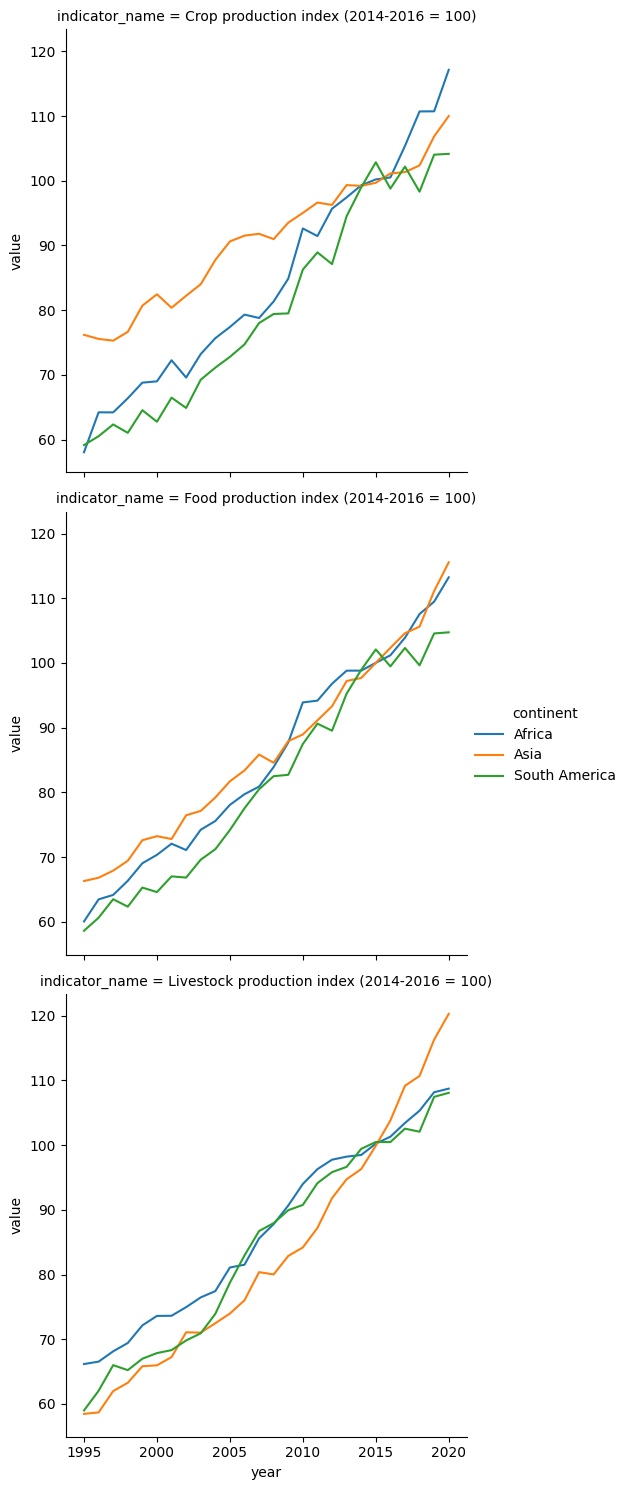

In [60]:
plt.figure(figsize=(12, 8))
ax = sns.relplot(data=continents_productivity, x='year', y='value', hue='continent', row='indicator_name', kind='line')

#ax.title('Changes in Productivity Indicators over Time')
plt.show()